## Content

- **Motivation**

- **Mathematical Notation**

- **Apriori Algorithm**
    - Issue with the approach
    - Optimizing the idea
    - Code walkthrough
    - Pros and Cons

- **Association Rule Mining**
    - How dies Association rule work
    - Examples
    - How do we know which assocaition is more strong ?
        - Support
        - Confidence
        - Lift
    - Code walkthrough

- **How can we draw conclusions from these association rules?**

- **What business strategy can we follow based on these findings?**

- **Summary**

- **Optional Metrics**

    



## Motivation

####  Question: How many of you watch movies online ?  

Whenever you visit an netflix/amazon for a movie or just a normal youtube page, you may have seen the following:




<center><img src="https://drive.google.com/uc?id=1JMORtH1v8jKA118kP_w8OW2xurVKLPFT" width="600"> </center>


<center><img src="https://drive.google.com/uc?id=1OZYvP15ThJKF-LnROrWTu_4dv2b2Ilid" width="600"> </center>



Netflix is able to recommend content based on what you enjoyed and explored.


Similarly, when you visit a supermarket
- you may have seen products being bundled together (say, cookies and juices)
- or discount on products if you buy them together.



<center><img src="https://drive.google.com/uc?id=15UTPDXmXnR5oYklk87-r-wOX28vzlkLF" width="600"> </center>

#### Question: So, how are these products bundled together ?

How are their placement decided in a supermarket ? Let's understand this with a simple example

Say, you went to a DMart for shopping.
- There are 100s or maybe 1000s of products available over there
- But you only want to shop for groceries.
- You picked up a cart and put in all the things that you needed and went to checkout counter

<center><img src="https://drive.google.com/uc?id=131puYop8mPR--HQ8PDdPwNV0s_S6082Z" width="600"> </center>

<center><img src="https://drive.google.com/uc?id=12DaPXNE-stPaGSmtwVFFGrnRqaDHU39g" width="600"> </center>






At checkout counter, there is a long queue. So, you decided to see what other people were buying:

<center><img src="https://drive.google.com/uc?id=1_vvXILoWeRA4HyQBoatW-4GZHulgbP1l" width="600"> </center>



#### Question: Did you notice a pattern in the what customers are buying ?

Notice that whoever is buying bread is also buying milk.



#### But is there any use of this pattern ?

As a store manager, recognizing the correlation between customers purchasing bread and subsequently buying milk,

you strategically position these items together to capitalize on the pattern and potentially increase sales.

This involves suggesting milk to customers who are already purchasing bread, thereby enhancing the likelihood of additional sales.

But, in real world there are 1000's of products in supermarket and hundreds of customer shopping at a single time.

#### How do we find pattern in such a complex scenario ?

Let's start with defining notations for all these to make our life easy.



## Mathematical notation


#### How many products are we dealing with here?

At huge super stores like DMart,
- we will have products across many categories:
    - Daliy essentials, Food products (like Milk, Butter, jam , bread, etc), Beauty Products, Toys, etc.

Let's define $D$ as the set of all the products we have, then,

$D=\left \{1, 2, 3, ..., n  \right \}$

<center><img src="https://drive.google.com/uc?id=1meWThjLTnqT8dhPwwmQd3067qY0bzjxF" width="600"> </center>


<br>




#### Do we have a way of representing the items bought by a customer?

Yes. Consider a customer that is done selecting the items they want, and are proceeding towards the billing counter. They present their **basket** full of products and the cashier scans the product bought and it's quantity.

This is called as a **transaction**, denoted by $T$.

For example,
- Suppose a customer bought item no. 1, 3, 6, and 8.
- This is represented as: $T1 = \left \{1, 3, 6, 8 \right \}$
- Similarly, there are other customers that bought some items as: <br>
$T2 = \left \{1, 3, 7, 12 \right \}$, <br>
$T3 = \left \{1, 7, 3, 16 \right \}$ <br>
... and so on till $m$ transactions (let).

If you think about it,
- all the transactions are the subset of the products available at supermarket.

- i.e, $T$ is essentially a **subset of $D$**, i.e. $T_i ⊆ D$


**DO NOTE:**

- We are only keeping track of what products customers bought

- We are **not keeping track of the quantity** of a product bought by the user, in this transaction representation.



<center><img src="https://drive.google.com/uc?id=1YxcGw55kr3vtMpJXzjGnlvtV4ei26xDb" width="600"> </center>




#### Identifying the pattern

Above we identified that customers are buying break and milk together.

Similarly, there can be other patterns as well. For example:
- Bread and milk
- Pen and notebook
- Toothbrush and paste
... and so on.

These are called as **item sets**.

As you can see from our transaction data above also, customers that are buying Item 1, also tend to buy Item 3. Here, the item set becomes: $\left \{1, 3 \right \}$


<br>



<center><img src="https://drive.google.com/uc?id=1gDXe18tKlsGZQAB4WbE17cJ_7B4Sty_i" width="600"> </center>




#### What's the outcome ?

Suppose there comes a customer that is buying Item1 but not buying Item3,
- since we already know based on a lot of transactional data, that these two are popularly bought together.
- We can recommend Item3 to the customer.

<center><img src="https://drive.google.com/uc?id=11vQp-f_KLQBIuCBMz2ILhKr_FNZ2XGGB" width="600"> </center>


 For example:
- In US, It was found that young adults between 5pm-7pm, tend to buy **beers** and **diapers** together.
- This is a very surprising relation, that **could not have been guessed!**
- Utilizing this fact, we can recommend the stores to keep diapers section close to where beers are kept.

But, in order to recommend products,
- we need to find the item sets from which to recommend.

#### What is our goal ?


**Given**
- $D$: Set of all items, and
- $T$: Set of all transactions

where
- Number of transactions $m$ >> Number of distinct items $n$

**To find:**
- **Item sets** that occur very frequently in transactions T.

<center><img src="https://drive.google.com/uc?id=12QLlzsqTLGDzFic3lQiZXpSPclcYUfT7" width=800> </center>


<br>

This technique of analyzing transaction data to give recommendations to the customer is called as **Market Basket Analysis**.

It is typically used in context of an offline store, where $n$ is not too large, it is typically a few hundreds.


#### Question: So, how do we do this programatically?



## Apriori Algorithm


Let's create **key value pairs**, where:
- **key:** represents the **item-sets** / pairs of items bought together
- **value:** represents the **count** of occurence of the key item set

For example:

<center><img src="https://drive.google.com/uc?id=1uDuy2GGBeWo5ddpgoai4vOKql9ZXL6MB" width=800> </center>



But, not all itemsets would be containing a pair.
- there may be other with 3 or more than 3 items in it.


<center><img src="https://drive.google.com/uc?id=1bOovKyKcwZW1IE_Q1BtqmXKZ_-sXvzC5" width=800> </center>

Item sets that have a very high frequency would have a relation, so based on that we can recommend items to the customer.




### Issue with the approach

We have 100s of unique items. ($D$)

If we were to create subsets of all the possible keys, the total number of subsets will become a large value.


For example:

- If $D= \left \{1, 2, 3\right \}$, then all the subsets are: $\left \{1 \right \}, \left \{2\right \}, \left \{3 \right \}, \left \{1, 2 \right \}, \left \{1, 3 \right \}, \left \{2, 3\right \}, \left \{1, 2, 3 \right \}$


i.e. we have total number of 7 possible subsets if we have 3 unique items.






#### Question: What if we have n items. How many subsets will we have ?

> Recall what we learnt in Math in school, the number of subsets of a set with $n$ elements is: $2^n$.

This is because, for all the $n$ items, there are 2 choices: To be present in the subset (1) OR be absent from the subset (0).

Which means, $2*2*2*2*...*2..n \ times = 2^n$.

This even includes the empty subset.

<br>

<center><img src="https://drive.google.com/uc?id=1onBaO4YB4xWgt3bBHRB-OiYHJSxcvu8-" width=600> </center>




#### Question: So, what will be the time complexity ?

- In our context, n is the number of products (167 in our case)

 - Even if we consider $n=100$, number of subsets of $D$, become $2^{100}$, which is an insanely high number.

- And for each subset, we'll have to scan through all the $m$ transaction sets to get the count,  
 - where recall that $m$ is the total number of transaction data and that it might be in millions.

This makes the time complexity as: $O(2^n *m)$

This is very tough to compute, it'll be very **very slow.**

<center><img src="https://drive.google.com/uc?id=1p6bCRVzHvR5w6N-DWy2CsbOchkO5djGb" width=700> </center>


###  How can we optimise on this idea?

To think of a possible optimization, first let's consider an example to get an idea across.


<center><img src="https://drive.google.com/uc?id=1VslIewem9D4h4YuG1VWyty3OhdBmVMgA" width=700> </center>




Suppose,

we found out that itemset $\{ bread, butter \}$ occurs 100 times in all the transactions.



#### Question: Will itemset {bread, butter, jam} occur less than, greater than or equal to 100 ?

It'll be strictly less than 100.

Because finding {bread, butter, jam} will be more rare than {bread, butter} in transactions.

Now,  

Imagine there's an itemset **{colgate, dairy milk}**
- Out of 100,000 transactions, this itemset only occurs 10 times

#### Question: Will you treat it as frequent item set ?

No, right ?

So, in order to treat an item set as frequent itemset, we need to have a **threshold value**

- This threshold will help us get condifence about the item set having a repeating pattern
    - it'll make sure that this many number of customers are known to have bought those items together.
    - hence, filtering out the itemsets with low repetition.

Now, suppose our **threshold** is **100**.

And,
- we know that {bread, butter} occues < 100 in transaction
- Also, we just saw that count of {bread, butter, jam} will also be < 100.

#### So, does it make sense to count the occurance of {bread, butter, jam}?

No.

If we know that a itemset, say {1, 2} occur less than threshold.
- So, it's super set say, {1,2, 4} will also occur less than 100 times.

**DO NOTE**
- This threshold is also known as **minimum support (c)**


#### Question: How can we use the intuition of minimum support (c) to optimize our solution approach?

- While listing down all the subsets of our items, $D$, say we come across a set $A$.
- Suppose the number of occurences of $A$ in the transaction data $T$ is less than the minimum support value, ie. $<c$
- Then, we need not consider $A$, or any of it's subsets.

For example:
- Let $c=100$, and we have the $D = \left \{1, 2, 3, 4\right \}$ and $T$ data.
- First, we list all the sets of size 1
 - $\left \{1\right \}, \left \{2\right \}, \left \{3\right \}, \left \{4\right \}$

- Now, we find the number of occurrences of each of these,
 - Let that be equal to $110, 200, 150, 50$ respectively.

- Since the number of occurrence of $\left \{4\right \}$ is less than $c$, no superset of it will occur more than 100 times, so we can ignore all of it's supersets.

- Now, we find subsets of size 2, for all sets which have occurred more than c
 - $\left \{1, 2\right \}, \left \{1, 3\right \}, \left \{2, 3\right \}$

- Again, we find number of occurences of each of these:
 - Let that be: $105, 110, 60$

- Since $60<c$, $\left \{2,3\right \}$ is **not** a frequent item-set

- Now, we build sets of size 3,
 - We know that $\left \{2, 3\right \}$ and $\left \{4\right \}$ cannot be a subset of it
 - So, the only element left is $1$, we cannot create set of length 3 with just that
 - So, there exist no superset of length 3.



<center><img src="https://drive.google.com/uc?id=14Hmq_xnJbjO5_vy9Geol7PILT85sOrxu" width=700> </center>





<br>

Though we'll still have to parse throught the $m$ transaction data for each item-set,
- but we're able to significantly reduce the number of item-sets ($2^n$).



<center><img src="https://drive.google.com/uc?id=1LaYWFaF186SvP5donGxdzPW3-kWZQjK2" width=700> </center>


This approach is known as the **Apriori Algorithm**, and it was developed around 1994-95.

- Though it is very simple in design, as soon as $n$ increases, it becomes too costly to be productive.

**The worst case complexity is still: $O(2^n*m)$**


### Code walkthrough



#### Data loading and exploration

Lets have a look at how transactional data looks like


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#importing CSV uploaded to drive

!gdown 1K1zSp3QZT-zByxc8Vj9AlF6PVnkISqTY

Downloading...
From: https://drive.google.com/uc?id=1K1zSp3QZT-zByxc8Vj9AlF6PVnkISqTY
To: /content/Groceries_data.csv
100% 1.57M/1.57M [00:00<00:00, 111MB/s]


In [ ]:
df = pd.read_csv("Groceries_data.csv")
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


- Only single product is mentioned in each row.
- There's no invoice number in the data

We'll check later whether a customer bought multiple items at a time.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


- The dataset contains 7 features with 38765 rows




#### Data Preprocessing

Lets count the unique Customer and unique items

In [ ]:
print(f'Number of Customers: {df["Member_number"].nunique()}')
print(f'Number of Unique Items: {df["itemDescription"].nunique()}')

Number of Customers: 3898
Number of Unique Items: 167


In [ ]:
df.describe()

,Member_number,year,month,day,day_of_week
count,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000
mean,3003.641868,2014.528518,6.477570,15.753231,3.014498
std,1153.611031,0.499193,3.431561,8.801391,1.987669
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2002.000000,2014.000000,4.000000,8.000000,1.000000
50%,3005.000000,2015.000000,6.000000,16.000000,3.000000
75%,4007.000000,2015.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


Observations:
- Customer ids range from 1000 to 5000
- However, total count of customers are 38k. Meaning there are multiple records for single customer id

- Also, data given to us is for year 2014 - 2015

In [ ]:
df.describe(include='object')

,Date,itemDescription
count,38765,38765
unique,728,167
top,2015-01-21,whole milk
freq,96,2502


- There are 728 unique dates. i.e. 2 years
- There are 167 unique products


#### What's the most frequent bought item?

In [ ]:
df['itemDescription'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

- Milk is one of the most frequent bought item followed by other vegetables.

Since, each row only represents single item.

Let's check if there are multiple records for a member on a same date.



In [ ]:
df.sort_values(by = ['Member_number', 'Date'])

,Member_number,Date,itemDescription,year,month,day,day_of_week
13331,1000,2014-06-24,whole milk,2014,6,24,1
29480,1000,2014-06-24,pastry,2014,6,24,1
32851,1000,2014-06-24,salty snack,2014,6,24,1
4843,1000,2015-03-15,sausage,2015,3,15,6
8395,1000,2015-03-15,whole milk,2015,3,15,6
...,...,...,...,...,...,...,...
9340,5000,2014-11-16,bottled beer,2014,11,16,6
25489,5000,2014-11-16,other vegetables,2014,11,16,6
3578,5000,2015-10-02,soda,2015,10,2,4
19727,5000,2015-10-02,root vegetables,2015,10,2,4


As you can see,
- there are multiple records for a single customer on single date

Let's concat all the items bought by a member in a day into a single row.

For this, we'll first create a column "invoice number" and based on it we'll group the records.

In [ ]:
df['invoice_num'] = df['Member_number'].astype(str)+ '-' + df['Date']

In [ ]:
df['items_bought'] = df.groupby(['invoice_num'])['itemDescription'].transform(lambda x: ','.join(x))

Notice that even after grouping the number of records are same.

In [ ]:
df[df['invoice_num'] == '1808-2015-07-21']

,Member_number,Date,itemDescription,year,month,day,day_of_week,invoice_num,items_bought
0,1808,2015-07-21,tropical fruit,2015,7,21,1,1808-2015-07-21,"tropical fruit,rolls/buns,candy"
16149,1808,2015-07-21,rolls/buns,2015,7,21,1,1808-2015-07-21,"tropical fruit,rolls/buns,candy"
36088,1808,2015-07-21,candy,2015,7,21,1,1808-2015-07-21,"tropical fruit,rolls/buns,candy"


There are multiple records for single items_bought. So, we'll drop the duplicate records

We also don't need itemDesc column now. So, we'll drop it as well

In [ ]:
df = df.drop_duplicates(['invoice_num'])

In [ ]:
df = df.drop('itemDescription', axis = 1)

In [ ]:
df.head()

,Member_number,Date,year,month,day,day_of_week,invoice_num,items_bought
0,1808,2015-07-21,2015,7,21,1,1808-2015-07-21,"tropical fruit,rolls/buns,candy"
1,2552,2015-05-01,2015,5,1,4,2552-2015-05-01,"whole milk,tropical fruit,chocolate"
2,2300,2015-09-19,2015,9,19,5,2300-2015-09-19,"pip fruit,other vegetables,flour"
3,1187,2015-12-12,2015,12,12,5,1187-2015-12-12,"other vegetables,onions,shopping bags"
4,3037,2015-01-02,2015,1,2,4,3037-2015-01-02,"whole milk,other vegetables,white bread"



Let's transform our data to the form of a **sparse matrix** such that:
* We encode the basket data into a binary data that shows whether an items is bought (1) or not (0)

>A sparse matrix is defined as the matrix of order MxN which has the number of zero values strictly greater than the number of non-zero values, distinct from those matrices which contain more non-zero values than zero values, they are called dense matrices.
- why will our matrix be sparse?
because we have a large list of items and for each transaction most of these items will not be bought. so they will be represented as zeros or false in that row. the items that are bought for that transaction will be represented by 1 or true.
hence very few ones compared to zeros



For this, we'll use a function called **[TransactionEncoder](http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/)**

>Encodes database transaction data in form of a Python list of lists into a NumPy array. like a one-hot encoded DataFrame, where each column consists of TRUE and FALSE values that indicate whether an item was included in a transaction. Each column represents an item and each row represent a record or a transaction for one purchase.

[mlxtend](https://rasbt.github.io/mlxtend/) just like scikit learn is another library for helpful data science algorithms

In [ ]:
items = df['items_bought'].apply(lambda x: x.split(','))

In [ ]:
item_list = items.to_list()

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
te = TransactionEncoder()

In [ ]:
transformed_items = te.fit(item_list).transform(item_list)

In [ ]:
matrix = pd.DataFrame(transformed_items, columns = te.columns_)

In [ ]:
matrix

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


#### Implementing Apriori Algorithm

We have a built-in function that implements apriori for us, under `mlxtend.frequent_patterns` library.

- As we discussed, we need to specify a minimum support threshold value, as parameter of this function.

- Since our column names represent the items, we use `use_colnames=True`

This will give us the most frequent item-sets, so let's sort them in desending order also, using `sort_values()`

Also, for easy interpretation, let's explicitly add a column stating the length of the itemset.


Source: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

In [ ]:
from mlxtend.frequent_patterns import apriori

In [ ]:


frequent_itemsets_plus = apriori(matrix, min_support=0.001,
                                 use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))

frequent_itemsets_plus

,support,itemsets,length
0,0.157923,(whole milk),1
1,0.122101,(other vegetables),1
2,0.110005,(rolls/buns),1
3,0.097106,(soda),1
4,0.085879,(yogurt),1
...,...,...,...
745,0.001002,"(margarine, chicken)",2
746,0.001002,"(bottled beer, chicken)",2
747,0.001002,"(chocolate, bottled beer)",2
748,0.001002,"(pastry, hamburger meat)",2


In [ ]:
frequent_itemsets_plus[frequent_itemsets_plus.length >= 2]

,support,itemsets,length
51,0.014837,"(other vegetables, whole milk)",2
56,0.013968,"(rolls/buns, whole milk)",2
62,0.011629,"(soda, whole milk)",2
63,0.011161,"(yogurt, whole milk)",2
65,0.010559,"(rolls/buns, other vegetables)",2
...,...,...,...
745,0.001002,"(margarine, chicken)",2
746,0.001002,"(bottled beer, chicken)",2
747,0.001002,"(chocolate, bottled beer)",2
748,0.001002,"(pastry, hamburger meat)",2


We get 750 most frequently occuring item-sets, using Apriori Algorithm!


*   Using apriori algorithm, we filter frequent itemsets by giving minimum support value of 0.1%
*   Length is the number of items in the itemset



### Pros and Cons


- Although it is quite simple and intuitive but
    - it is not used in e-commerce today, where the number of products is very very large (in millions).

- As n (number of products) increases, it becomes very costly.


<center><img src="https://drive.google.com/uc?id=1ndK8iPt_Nvi_rmHrqa1QroZayU9Aa4Xx" width=700> </center>









<br>

#### Modification to Apriori ?

Modifications have been made over the concept of Apriori algorithm with time. This has given rise to a new technique:-
- **Frequent Pattern (FP) growth items**
 - Uses specialised data structure of **tries**
 - It is faster

Regardless of the modifications of FP growth, essentially we're still performing **frequency item-set mining**
- These are still very very expensive
- It is useful only when the number of items $n$ of $|D|$ is small

---

## Association Rule Mining

<center><img src="https://drive.google.com/uc?id=1WeOuN0nFj8CDXdNWz5lEgUHEqUfPJQVV" width=500> </center>




#### Question: Ever been to Mac D or Burger King ?

Suppose you went to a McDonald's and order fries and burger
- The server then recommends you a combo with a soft drink included.


<center><img src="https://drive.google.com/uc?id=10jSf6gszRJNPNqX-0XnwD9RmLYj8Jxn5" width=600> </center>

Based on what you have in your order basket, they recommend you products which you may like. This is called as **cross selling**

<center><img src="https://drive.google.com/uc?id=1UqyTRQ7iNLwy0nQM-2uYiyuN5B0pTXok" width=600> </center>

But, they can't simply recommend random products to add to your cart.
- Imagine ordering for a burger and they recommend pan cakes. **Doesn't makes sense, right ?**

So, there must be some association in the products.

#### How do we find these associations ?







We have another tool in the Market Basket Analysis, called the **Association rule**, using which we can find relations between these frequent item-sets.

<br>

### How does the Association rule work?

Consider we have our set of items: $D = \left\{ 1, 2, 3, ..., n\right\}$

Let's define X and Y as another sets of items, as follows:-
- $X= \left \{1, 2, 3 \right\}$
- $Y = \left\{ 4, 6 \right\}$

If the item-set $\left \{1, 2, 3, 4, 6\right \}$ is a **frequent itemset**, then according to the **Association Rule** of Market Basket Analysis, we can say that
- "People who buy $X$, have a very high likelihood to buy $Y$ also.

This can be written as: $X -> Y$

**It is read as: "If X, then Y".**

<center><img src="https://drive.google.com/uc?id=1m3dljjwpb5a8XXaHabzOe7cglbqdm_xg" width=800> </center>

<br>



### Examples of association rule mining

- **If** a person buys an iphone, **then** there is a high tendency of buying a charger.
    - {iphone} -> {charger}

- **If** a person buys beer, **then** there is a high tendecy of buying diapers
 - $\left\{ beer \right \} -> \left\{ diapers \right\}$

- People buying milk and bread, also tend to buy jam and eggs
 - $\left\{ milk, bread \right \} -> \left\{ jam, eggs \right\}$

<center><img src="https://drive.google.com/uc?id=1iEt3RUWaonxG965iV2Ai_oEOOxq_1QsO" width=600, height=400> </center>

<br>



#### Question: Can X and Y be used interchangeably?

**No.**

$X → Y$ is not the same as $Y → X$

When we say,
- People buying fries/burger, have high tendecy of buying coke,
- that **does not imply** that people buying coke, have a high tendency of buying burger/fries.


<center><img src="https://drive.google.com/uc?id=1IW_q9kVPB0nScowvXluShiMCMFXX5gmn" width=600> </center>



In order to set these apart, we have the following terminologies in place:
- **Antecedent (If):** The items on the LEFT ie., the item which the customer buy
- **Consequent (Then):** The items on the RIGHT ie., the item which the customer follows to buy.

Let's take another example:

Consider that you are at Domino's,
- It is more likely for a customer to buy combination of **pizza + coke**
- than a combination of **pizza + garlic bread**

Though, both these associations rules hold true:-
- $\left\{ pizza → coke \right \}$
- $\left\{ pizza → garlic \ bread \right \}$

We know that one of them is more strongly associated than the other.




<br>

###  How do we know which association is more strong ?

For this, let's take a look at couple of matrics related to assocation mining

- **Support**
- **Confidence**
- **Lift**





## Support


Support is a metric of How frequently does an item or item-set occur in the transaction data

OR

In simple terms, what percentage of transaction contain this item or item set.

<br>



#### How is support calculated?

This is calculated by dividing the number of transactions of where an itemset $X$ has occured in the transaction (let this be x), by the total number of transactions (let this be N)

$Support(X) = \frac{x}{N}$


Let's take an example:


<center><img src="https://drive.google.com/uc?id=1NjvESHZMxq5UW2lGYG13LBYUq9I_AfJN" width=600> </center>


#### What will be support(Apple) in this case?
- There are 4 transac. in which apple appears
- There are total of 5 transac

Support(Apple) = $\frac{4}{5}$ = 0.8 or 80%

<br>

#### Question: What will be the support{Apple, egg}?
- There are 3 transac. in which {apple, egg} occurs

Support{apple, egg} = $\frac{3}{5}$ = 0.6 or 60%


<br>

#### How can we interpret a support value?


- support is essentially the probability of an item-set $X$ occuring in the transaction data $T$.


#### Hack to rememeber

How many transactions **support** the claim of this product to be a popular one.

- Intuitively, it tell how popular is the product.
- If a product is popular, more number of transaction will have it, and hence, more will be support


## Confidence

Using Association rules, we stated that a person buying $X$ also tends to by $Y$, where $X$ and $Y$ are item sets.

#### Since we need to base some business decisions on this, How confident are we in this statement?

- If we know that people buying milk and bread also tend to buy jam and eggs,
    - then we can make a business decision and place all these items very close to each other.

But in order to make that decision, we first need to know how sure in this.

This can be answered by a term in market basket analysis called **confidence**

Confidence tells about the number of times these relationships have been found to be true

<br>



#### How can we calculate confidence?

This can be calculated by dividing the number of times both $X$ and $Y$ occur in transactions, by the number of times just $X$ occurs in transactions.

$confidence(X->Y) = \frac{Number \ of \ transactions \ with \ X \ and \ Y}{Number \ of \ transactions \ with \ X}$




<br>

#### How can we interpret a confidence value?

- This can be thought of as probability of $Y$ conditioned on $X$, $P(Y|X)$

 - i.e. Of all the times that $X$ occurs, how many times do we observe $Y$.

 - If $X U Y$ is a frequent itemset itself, then the confidence will be very high $≈90$%

- The confidence measure helps identify which product drives the sale of which other product.
 - For any two products, A drives B  {A ⇒ B} is not the same as B drives A, {B ⇒ A}


<center><img src="https://drive.google.com/uc?id=17rACPsQ_zsyix1WPwjGPLUUNUDBPbhjM" width=600> </center>



#### What would be the confidence{apple -> egg} ?

Confidence{apple -> egg} = $ \frac{ \# \space apple \space and  \space egg \space occur \space together}{\# times \space apple \space occur} $

=> $\frac{3}{5}$ = 0.75

- confidence value of 0.75 implies that out of all transactions that contain apple, 75% of them also contain egg.

**Note:**

- Confidence values range from 0 to 1, where
- 0 indicates that B is never purchased when A is purchased, and
- 1 indicates that B is always purchased whenever A is purchased.

**Note:**
- A rule may show a strong correlation in a data set because it appears very often but may occur far less when applied (i.e checked against the antecedent).
 - This would be a **case of high support, but low confidence**.

- Conversely, a rule might not particularly stand out in a data set, but continued analysis shows that it occurs very frequently.
 - This would be a **case of high confidence and low support**.



#### Issue with confidence

Consider the combination: {Cornflakes} → {Milk}
- This should be a high confidence rule.

<br>

> **Q. What about {Yogurt} → {Milk}?**

High again.

<br>

> **Q. What about {Toothbrush} → {Milk}?**

Not so sure?
- Confidence for this rule will also be **high** since {Milk} is such a frequent itemset and would be present in every other transaction.

- It does not matter what you have in the antecedent for such a frequent consequent.
- The confidence for an association rule having a very frequent consequent will always be high

Analyse this:
<ul>
<li>Total transactions = 100
<li> 80 of them have milk
<li> 14 of them have toothbrush
<li> 10 of them have both milk and toothbrush
</ul>

Confidence for {Toothbrush} → {Milk} will be 10/14 = 0.7

Looks like a high confidence value. But we know intuitively that these two products have a weak association and there is something misleading about this high confidence value.

<br>







#### How can we overcome this problem?

Since, Considering just the value of confidence limits our capability to make any business inference.

**Lift** is introduced to overcome this challenge.

## Lift

Given two items, A and B, lift indicates whether there is a relationship between A and B, or whether the two items are occuring together in the same orders simply by chance (ie: at random).


Let's understand it with an example:


<center><img src="https://drive.google.com/uc?id=1E3xEP-Er1Dm6BFa8p9XXJVhLyOHyud5i" width=700, height=400> </center>



From the above figures, we can conclude that
- if there was no relation between Bread and Milk (that is, they were statistically independent),
 - then we would have got only 10% of Bread purchasers to buy Milk too.

- However, as surprising as it may seem, the figures tell us that 80% (=6000/7500) of the people who buy Bread also buy Milk.

This is a significant jump of 8x over what was the expected probability.

This **factor of increase is known as Lift** – which is the ratio of the observed frequency of co-occurrence of our items and the expected frequency.

Based on the low percentages we are seeing here (1.25%, 10%, 1%), we would have expected a low lift%.  

However, the fact that about 80% of Bread purchases include the purchase of Milk indicates a link between Bread and Milk.




#### How is lift calculated?


It is based on the idea that, if $X$ and $Y$ are independent events, then the probability of $X and Y$ is equal to the product of their individual probabilities: $P(X ∩ Y) = P(X) . P(Y)$

Lift can be calculated by dividing the support of X and Y, by their individual support values.

$lift(X → Y) = \frac{support(X ∩ Y)}{support(X).support(Y)} = \frac{confidence(X → Y)}{support(Y)}$

This can be interpreted as being the same as: $\frac{P(X ∩ Y)}{P(X) . P(Y)}$

<center><img src="https://drive.google.com/uc?id=1sBuSIodPfZGx0LucdybHS5s3AXw8Ui7J" width=700, height=400> </center>



<br>

#### What happens if X and Y are actually independent?

In that case, the numerator and denominator will be both equal, and give a result of 1.

Otherwise, the numerator will be greater.

- $lift(X→Y) = 1$, if X and Y are independent
- $lift(X→Y) < 1$, unlikely to be bought together: **negative correlation**
- $lift(X → Y) > 1$, likely to be bought together: **positive correlation**

**Note:**
- The value of lift ranges from **0 to infinity**.

<center><img src="https://drive.google.com/uc?id=1OthtFLTk7dwd8yK6ajbWCok0PdYLtRJ4" width=900, height=300> </center>


Now if we analyse the two itemset pair where both had high confidence :

$Lift\left\{Bread -> Milk\right\} = \frac{Confidence \left\{Bread -> Milk\right\}}{ Support(Milk)}$
$ = \frac{6000/7500}{60,000/600,000} = 80$

<br>

Similarly, we get

$ Lift \left\{Toothbrush → Milk \right\} = \frac{Confidence \left\{Toothpaste -> Milk\right\}}{ Support(Milk)} = \frac{0.7}{0.8} = 0.87$

<br>
A value of lift less than 1 shows that having toothbrush on the cart does not increase the chances of occurrence of milk on the cart in spite of the rule showing a high confidence value



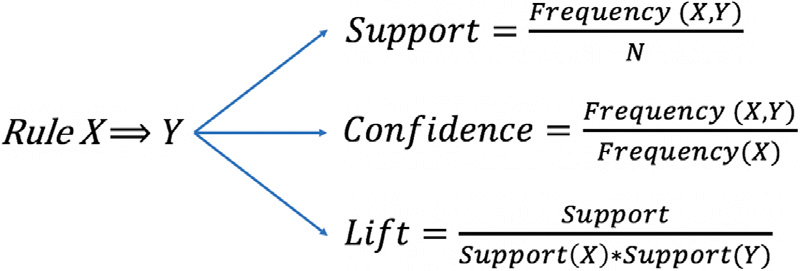

#### Code walkthrough




- After applying the apriori algorithm and finding the frequently bought item, we apply the association rules.
- From association rules, we could extract information about which items are more effective to be sold together

We have a built-in function `association_rules` for this as well in the same library: `mlxtend.frequent_patterns`.

**Note:**
- We pass the frequent item sets we got from apriori algo as the parameter here.

In [ ]:
from mlxtend.frequent_patterns import association_rules

In [ ]:
rules=association_rules(frequent_itemsets_plus, metric='lift',
                  min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219
1,(sausage),"(yogurt, whole milk)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532
2,"(whole milk, sausage)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
3,(yogurt),"(whole milk, sausage)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307
4,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081


## How can we draw Conclusions from these associations rules?


*   We can see {yougurt, milk} and Sausage are the items that has the highest association each other since these two items has the **highest lift value**, i.e 2.18

 *   This tells us that 'sausage' is 14.6 times more likely to be bought by the customers who buy '{yougurt, milk}' compared to the **default likelihood sale** of 'sausage’

* Since the antecedent support > consequent support, the rule that applies is **{yogurt, whole milk} -> sausage**

 * This means that  a customer has a higher tendency to buy sausage AFTER they buy {yogurt, whole milk}. Not  the other way around


- Since we know the sale of yogurt + whole milk drives sales of sausage,
    - We can apply promotional offer on yougurt + whole milk combo.
    - Hence, driving the sales for sausages up.

Similarly, we can draw other business conclusions from these association rules, which will lead in increase in revenue!


## What Business Strategy can we follow based on these findings?



*   **Item Placements:** We could place these two products together for easy accessiblity and increase sales

*   **Product Bundling:** We could bundle these two products and sell it together at a discounted price compared to each price combined

* **Customer Recommendation & Discounts:** We could place sausages near the cashier, and every time a customer buys yougurt + whole milk, we could offer and recommend them to buy sausages with a lower price



#### Q. Other than retail setups, can you think of other applications of Market Basket Analysis?

##**Bio-informatics**

<center><img src="https://drive.google.com/uc?id=1DRXHy2Dm4MjtJMIuRaE6FQOdXmT_LJCD" width=500, height=300> </center>


 - If two chemical components $c_1$ and $c_3$ occur frequently within different proteins, then we can find out that perhaps there is some relation between these components
 - If two gene sequences $ATTC$ and $AGTC$ occur frequently, in the sequence of some mammal, then we can find out that perhaps there is some relation between them.

##**Telecommunications**.

<center><img src="https://drive.google.com/uc?id=1lqLxadWCukhCIWZpOynCV-pUqczzO4Zv" width=300, height=300> </center>



  - In Telecommunications, where high churn rates continue to be a growing concern, Market Basket Analysis can be used to determine what services are being utilized and what packages customers are purchasing.
    - They can use that knowledge to direct marketing efforts at customers who are more likely to follow the same path.

##**Medicine**

<center><img src="https://drive.google.com/uc?id=1JM-vVs-8DcR-Or4lb7V2v6afmYiyQfwt" width=300, height=300> </center>


 - If we find that according to a doctor's presecription, medicines $m_1, m_2$ and $m_3$ are being prescribed frequently, then it means that together they form some combination drug, which can cure a certain ailment.




##**Finding similar webpages / web usage mining**

<center><img src="https://drive.google.com/uc?id=17l5ITUYRk1ssiyWo1NiB9avY_k4uiQdQ" width=400, height=300> </center>

 - If in a single session many users are visiting the same webpages ($w_1, w_2, w_3$), then perhaps they are related in nature

##**Finding similar words**


<center><img src="https://drive.google.com/uc?id=1qnxsVFgphVu5teMM5cCYAC1Wwh2WBgbt" width=550, height=300> </center>

## Summary

- Market basket analysis is a business problem, which can be solved using **Apriori algorithm / FP growth algorithm**.
- Also, market basket analysis can be interpreted in the context of **association rule mining**
- To find these association rule mining, and frequent item sets, we will still go to appriori and FP growth algos



## Optional metrics

#### Leverage

There is another metric called **leverage** that is constructed using support. This is very similar to lift.

<br>

> **Q. How is leverage calculated?**

To compute the leverage of "if X then Y" i.e. $X->Y$, we compute the support of $X and Y$, and subtract the product of support of X, and support of Y from it.

$leverage(X->Y) = support(X \cap Y) - (support(X)*support(Y))$

<br>

> **Q. What is the advantage of using leverage over lift values**

- Though it is similar to lift, but leverage is **easier to interpret**.
- Leverage value lies in the range of **-1 to +1**, whereas lift value ranges from 0 to infinity.

#### Conviction

> **Q. How can we calculate conviction value?**

It can be calculated as the ratio of the expected frequency that X occurs without Y if X and Y were independent divided by the observed frequency of incorrect predictions.

$Conv (X → Y) = \frac{1 - S(Y)}{1 - C(X → Y)}$

<br>

> **Note**

A high value means that the consequent depends strongly on the antecedent.
